In [1]:
import pandas as pd
import os
from venn import venn
%matplotlib inline
os.chdir('../')

In [2]:
df = pd.read_csv('output/input_alternative.csv')

In [3]:
num_patients=len(df["patient_id"].unique())
print("num patients:", num_patients)

num patients: 10000


Hospitalisations

In [4]:

num_patients_hospital_admission = len(df.loc[df["hospital_admission_any_cause"]==1,"patient_id"])


num_patients_emergency_hospital_admission = len(df.loc[df["emergency_hospital_admission_date"].notnull(),"patient_id"])


num_patients_emergency_covid_hospital_admission = len(df.loc[df["emergency_covid_hospital_admission_date"].notnull(),"patient_id"])

num_patients_emergency_primary_covid_hospital_admission = len(df.loc[df["emergency_primary_covid_hospital_admission_date"].notnull(),"patient_id"])





In [5]:
hospitalisation_dict = {
    "hospital_admission": num_patients_hospital_admission,
    "emergency_hospital_admission": num_patients_emergency_hospital_admission,
    "emergency_admission_covid": num_patients_emergency_covid_hospital_admission,
    "emergency_admission_primary_covid": num_patients_emergency_primary_covid_hospital_admission,
}

pd.DataFrame.from_dict(hospitalisation_dict, orient='index')

,0
hospital_admission,3000
emergency_hospital_admission,3000
emergency_admission_covid,3000
emergency_admission_primary_covid,3000


A&E before COVID emergency hospital admission:

In [6]:
num_ae_before = len(df.loc[
    (df["emergency_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_emergency_covid_hospital_admission"]==1)
    ,"patient_id"])

num_ae_with_discharge = len(df.loc[
    (df["emergency_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_emergency_covid_hospital_admission_any_cause_with_discharge"]==1)
    ,"patient_id"])

num_ae_with_hospital_discharge = len(df.loc[
    (df["emergency_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1)
    ,"patient_id"])

num_ae_with_hospital_discharge_covid = len(df.loc[
    (df["emergency_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    (df["ae_attendance_before_emergency_covid_hospital_covid_status"]==1)
    ,"patient_id"])

num_ae_with_hospital_discharge_resp_plus_pos_test = len(df.loc[
    (df["emergency_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    ((df["ae_attendance_before_emergency_covid_hospital_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance_before_emergency_covid_hospital"]==1))
    ,"patient_id"])


num_ae_classified = len(df.loc[
    (df["emergency_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_before_emergency_covid_hospital_covid_status"]==1) |
        (
            (df["ae_attendance_before_emergency_covid_hospital_respiratory_status"]==1) &
            (df["positive_covid_test_before_ae_attendance_before_emergency_covid_hospital"]==1)
        )
    )
    ,"patient_id"])


In [7]:
# ae admission with criteria but no hospital admission or the hospital admission was before ae
ae_admission_no_hospital = len(df.loc[
    (
       (
            (df["ae_attendance_any_cause_hosp_discharge"]==1) &
            (
                (df["ae_attendance_covid_status"]==1) |
                ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
            )
       )
        &
        (df["emergency_primary_covid_hospital_admission_date"].isnull())
    )
    
    |
    
    (
        (
                (df["ae_attendance_any_cause_hosp_discharge"]==1) &
                (
                    (df["ae_attendance_covid_status"]==1) |
                    ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
                )
           
            &
            (df["emergency_primary_covid_hospital_admission_date"].notnull())
            
            &
            
            (df["emergency_primary_covid_hospital_admission_date"] < df["ae_attendance_any_cause_date"])
            
        )
    
    )
    
    ,"patient_id"])
ae_admission_no_hospital 

df["ae_admission_no_hospital"] = df.loc[
    (
       (
            (df["ae_attendance_any_cause_hosp_discharge"]==1) &
            (
                (df["ae_attendance_covid_status"]==1) |
                ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
            )
       )
        &
        (df["emergency_primary_covid_hospital_admission_date"].isnull())
    )
    
    |
    
    (
        (
                (df["ae_attendance_any_cause_hosp_discharge"]==1) &
                (
                    (df["ae_attendance_covid_status"]==1) |
                    ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
                )
           
            &
            (df["emergency_primary_covid_hospital_admission_date"].notnull())
            
            &
            
            (df["emergency_primary_covid_hospital_admission_date"] < df["ae_attendance_any_cause_date"])
            
        )
    
    )
    
    ,"patient_id"]

In [8]:
ae_before_hospitalisation_dict = {
    "ae before": num_ae_before,
    "ae before with discharge": num_ae_with_discharge,
    "ae before with hospital discharge": num_ae_with_hospital_discharge,
    "ae with covid and hospital discharge": num_ae_with_hospital_discharge_covid,
    "ae with resp/test and hospital discharge": num_ae_with_hospital_discharge_resp_plus_pos_test,
    "classified": num_ae_classified
}

pd.DataFrame.from_dict(ae_before_hospitalisation_dict, orient='index')

,0
ae before,1509
ae before with discharge,1189
ae before with hospital discharge,1178
ae with covid and hospital discharge,1057
ae with resp/test and hospital discharge,511
classified,1111


A&E before primary COVID emergency hospital admission:

In [9]:
num_ae_before_prim = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission"]==1)
    ,"patient_id"])

num_ae_with_discharge_prim = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission_any_cause_with_discharge"]==1)
    ,"patient_id"])

num_ae_with_hospital_discharge_prim = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1)
    ,"patient_id"])

num_ae_with_hospital_discharge_covid_prim = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_covid_status"]==1)
    ,"patient_id"])

num_ae_with_hospital_discharge_resp_plus_pos_test_prim = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    ((df["ae_attendance_before_prim_emergency_covid_hospital_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance_before_prim_emergency_covid_hospital"]==1))
    ,"patient_id"])


num_ae_classified_prim = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_before_prim_emergency_covid_hospital_covid_status"]==1) |
        (
            (df["ae_attendance_before_prim_emergency_covid_hospital_respiratory_status"]==1) &
            (df["positive_covid_test_before_ae_attendance_before_prim_emergency_covid_hospital"]==1)
        )
    )
    ,"patient_id"])

df["num_ae_classified_prim"] = df.loc[
    (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
    (df["ae_attendance_before_prim_emergency_covid_hospital_admission_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_before_prim_emergency_covid_hospital_covid_status"]==1) |
        (
            (df["ae_attendance_before_prim_emergency_covid_hospital_respiratory_status"]==1) &
            (df["positive_covid_test_before_ae_attendance_before_prim_emergency_covid_hospital"]==1)
        )
    )
    ,"patient_id"]

In [10]:
ae_before_hospitalisation_prim_dict = {
    "ae before": num_ae_before_prim,
    "ae before with discharge": num_ae_with_discharge_prim,
    "ae before with hospital discharge": num_ae_with_hospital_discharge_prim,
    "ae with covid and hospital discharge": num_ae_with_hospital_discharge_covid_prim,
    "ae with resp/test and hospital discharge": num_ae_with_hospital_discharge_resp_plus_pos_test_prim,
    "classified": num_ae_classified_prim,
    "ae no hospital" :ae_admission_no_hospital 
}

pd.DataFrame.from_dict(ae_before_hospitalisation_prim_dict, orient='index')

,0
ae before,1498
ae before with discharge,1217
ae before with hospital discharge,1154
ae with covid and hospital discharge,1036
ae with resp/test and hospital discharge,509
classified,1090
ae no hospital,2865


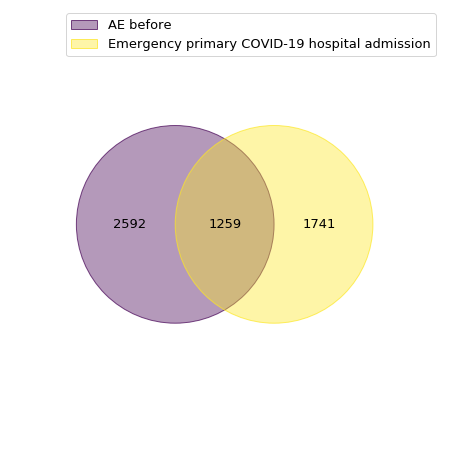

In [16]:
venn({ "AE before": set(df.loc[df["ae_admission_no_hospital"].notnull() | df["num_ae_classified_prim"].notnull(), "patient_id"]), "Emergency primary COVID-19 hospital admission": set(df.loc[df["emergency_primary_covid_hospital_admission_date"].notnull(), "patient_id"])})

A&E admissions

In [ ]:
num_patients_ae = len(df.loc[df["ae_attendance_any_cause"]==1,"patient_id"])

num_patients_ae_with_discharge = len(df.loc[df["ae_attendance_any_cause_with_discharge"]==1,"patient_id"])


num_patients_ae_hosp_discharge = len(df.loc[df["ae_attendance_any_cause_hosp_discharge"]==1,"patient_id"])


num_patients_ae_covid = len(df.loc[df["ae_attendance_covid_status"]==1,"patient_id"])


num_patients_ae_resp = len(df.loc[df["ae_attendance_respiratory_status"]==1,"patient_id"])


num_patients_ae_covid_test = len(df.loc[df["positive_covid_test_before_ae_attendance"]==1,"patient_id"])

num_patients_classified_at_ae = len(df.loc[
    (df["ae_attendance_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_covid_status"]==1) |
        ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
    )
    ,"patient_id"])

df["classified_at_ae"] = df.loc[
    (df["ae_attendance_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_covid_status"]==1) |
        ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
    )
    ,"patient_id"]

num_admitted_after_primary = len(df.loc[
    (df["emergency_primary_covid_hospital_admission_after_ae"]==1) &
    (df["ae_attendance_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_covid_status"]==1) |
        ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
    )
    ,"patient_id"])

df["admitted_after_primary"] = df.loc[
    (df["emergency_primary_covid_hospital_admission_after_ae"]==1) &
    (df["ae_attendance_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_covid_status"]==1) |
        ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
    )
    ,"patient_id"]

num_admitted_after = len(df.loc[
    (df["emergency_covid_hospital_admission_after_ae"]==1) &
    (df["ae_attendance_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_covid_status"]==1) |
        ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
    )
    ,"patient_id"])

df["num_admitted_after"] = df.loc[
    (df["emergency_covid_hospital_admission_after_ae"]==1) &
    (df["ae_attendance_any_cause_hosp_discharge"]==1) &
    (
        (df["ae_attendance_covid_status"]==1) |
        ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
    )
    ,"patient_id"]


In [ ]:
df["emergency_primary_covid_hospital_admission_date"] = pd.to_datetime(df["emergency_primary_covid_hospital_admission_date"])
df["ae_attendance_any_cause_date"] = pd.to_datetime(df["ae_attendance_any_cause_date"])
    

In [ ]:
# hospital admission but no a&E satisfying or satisyfing ae but it was not before hospital
df["hospital_admission_no_ae"] = df.loc[
    (
         ~((df["ae_attendance_any_cause_hosp_discharge"]==1) &
            (
                (df["ae_attendance_covid_status"]==1) |
                ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
            )
        )
        & 
        
        (df["emergency_primary_covid_hospital_admission_date"].notnull()) 
        
        
       
    )
    |
    (
        (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
        ((df["ae_attendance_any_cause_hosp_discharge"]==1) &
            (
                (df["ae_attendance_covid_status"]==1) |
                ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
            )
        )
         &
        (df["emergency_primary_covid_hospital_admission_date"] < df["ae_attendance_any_cause_date"])
    )
    
    
    
    ,"patient_id"]

hospital_admission_no_ae = len(df.loc[
   
    (
        (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
        
        
        ~((df["ae_attendance_any_cause_hosp_discharge"]==1) &
            (
                (df["ae_attendance_covid_status"]==1) |
                ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
            )
        )
    )
    |
    (
        (df["emergency_primary_covid_hospital_admission_date"].notnull()) &
        ((df["ae_attendance_any_cause_hosp_discharge"]==1) &
            (
                (df["ae_attendance_covid_status"]==1) |
                ((df["ae_attendance_respiratory_status"]==1) & (df["positive_covid_test_before_ae_attendance"]==1))
            )
        )
         &
        (df["emergency_primary_covid_hospital_admission_date"] < df["ae_attendance_any_cause_date"])
    )
    
    
    
    ,"patient_id"]
)


In [ ]:
ae_dict = {
    "ae": num_patients_ae,
    "ae with discharge": num_patients_ae_with_discharge,
    "ae with hospital discharge": num_patients_ae_hosp_discharge,
    "ae with covid": num_patients_ae_covid,
    "ae with resp": num_patients_ae_resp,
    "covid test +ve": num_patients_ae_covid_test
}

pd.DataFrame.from_dict(ae_dict, orient='index')

Hospitalisation after A&E

In [ ]:
hospital_after_ae_dict = {
    "num classified at ae": num_patients_classified_at_ae,
    "hospital after ae": num_admitted_after,
    "primary hospital after ae": num_admitted_after_primary,
    "hospital admission no ae": hospital_admission_no_ae
}

pd.DataFrame.from_dict(hospital_after_ae_dict, orient='index')

In [ ]:
venn({"A&E attendance with filters": set(df.loc[df["classified_at_ae"].notnull(), "patient_id"]), "Emergency primary COVID-19 hospital admission": set(df.loc[df["hospital_admission_no_ae"].notnull() | df["admitted_after_primary"].notnull(), "patient_id"])})